$\langle\dot{\phi}\rangle = \frac{3m_oc^2R_e}{2qk_0}Lg(\alpha_0)\gamma\beta^2$

$\Tau_d = \frac{2\pi}{\langle\dot{\phi}\rangle}$

$g(\alpha_0)\approx 0.7 + 0.3sin\alpha_0$

$\frac{3m_0c^2R_e}{2qk_0}=\begin{cases}3.50x10^{-2} \qquad deg/sec\quad for \quad electrons \\ 64.2 \qquad deg/sec \quad for \quad protons\end{cases}$

In [1]:
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
import scipy.constants as C


In [2]:
def period(L, W, alpha=np.pi*0.5):
    W_static = 0.511 # MeV
    g_alpha = 0.7 + 0.3 * np.sin(alpha)
    gamma = 1 + W/W_static
    betasquare = 1 - 1 / gamma**2   
    phi_dot = 3.50e-2 * L * g_alpha * gamma * betasquare
    tau = 360 / phi_dot
    return tau

In [6]:
period(6, 1e-3) / 3600

121.78559791463364

In [4]:
L = np.linspace(4, 10, 100)
taus = list()
ws = list()
for l in L:
    C = 216
    W = C * l **(-3)
    tau = period(l, W)
    taus.append(tau)
    ws.append(W)
logL = np.log(L)
logtau = np.log(taus)

from scipy import optimize
def f_1(x, k, b):
    return k * x + b

k = optimize.curve_fit(f_1, logL, logtau)
gamma = k[0][0]
print(gamma)

1.528228840005279


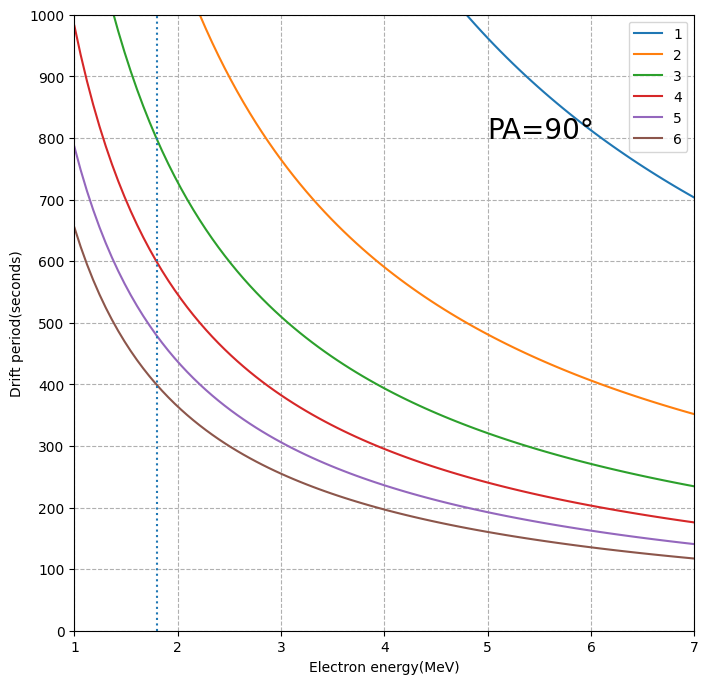

In [5]:
x = np.linspace(1, 7, 100)
alpha = np.pi/2
y = [period(L, W=x, alpha=alpha) for L in range(1, 7)]
fig, ax = plt.subplots(figsize=(8,8))
ax.set_ylim(0, 1000)
ax.set_xlim(1, 7)
ax.set_xlabel('Electron energy(MeV)')
ax.set_ylabel('Drift period(seconds)')
ax.set_yticks([i * 100 for i in range(11)])
ax.plot(x, y[0], label='1')
ax.plot(x, y[1], label='2')
ax.plot(x, y[2], label='3')
ax.plot(x, y[3], label='4')
ax.plot(x, y[4], label='5')
ax.plot(x, y[5], label='6')
ax.text(5, 800, "PA={:.0f}°".format(np.rad2deg(alpha)), fontsize=20)
ax.vlines(1.8, ymin=0, ymax=1000,linestyle=':')
ax.grid(linestyle='--')
ax.legend()

In [6]:
def period_mu(L, mu, alpha=np.pi*0.5): # mu(MeV/Guass)
    B = 0.311 / L**3
    # W = mu * B
    W_static = 0.511 # MeV
    g_alpha = 0.7 + 0.3 * np.sin(alpha)
    # gamma = 1 + W/W_static
    gamma = np.sqrt(1 + 2 * mu * B / W_static)
    betasquare = 1 - 1 / gamma**2   
    phi_dot = 3.50e-2 * L * g_alpha * gamma * betasquare
    tau = 360 / phi_dot
    return tau

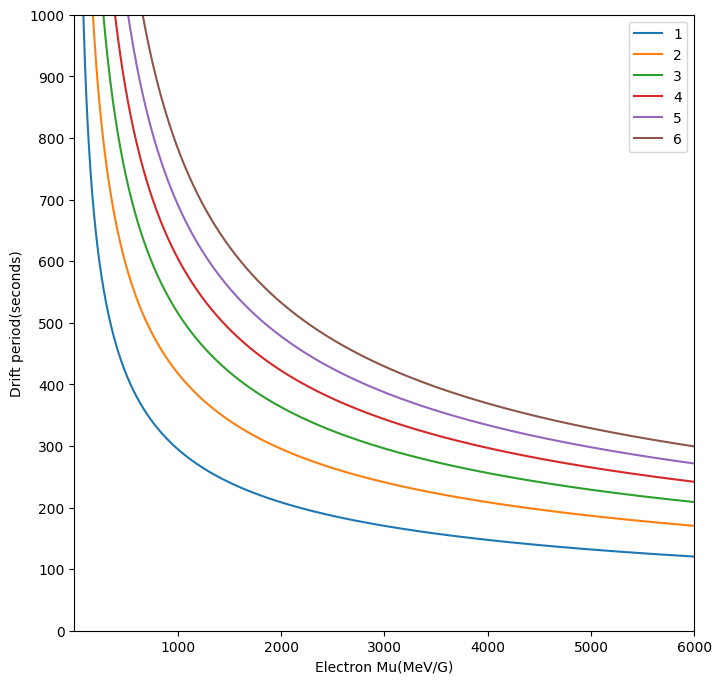

In [7]:
x = np.linspace(1, 6000, 1000)
y = [period_mu(L, mu=x) for L in range(1, 7)]
fig, ax = plt.subplots(figsize=(8,8))
ax.set_ylim(0, 1000)
ax.set_xlim(1, 6000)
ax.set_xlabel('Electron Mu(MeV/G)')
ax.set_ylabel('Drift period(seconds)')
ax.set_yticks([i * 100 for i in range(11)])
ax.plot(x, y[0], label='1')
ax.plot(x, y[1], label='2')
ax.plot(x, y[2], label='3')
ax.plot(x, y[3], label='4')
ax.plot(x, y[4], label='5')
ax.plot(x, y[5], label='6')
ax.legend()

Text(0, 0.5, 'period')

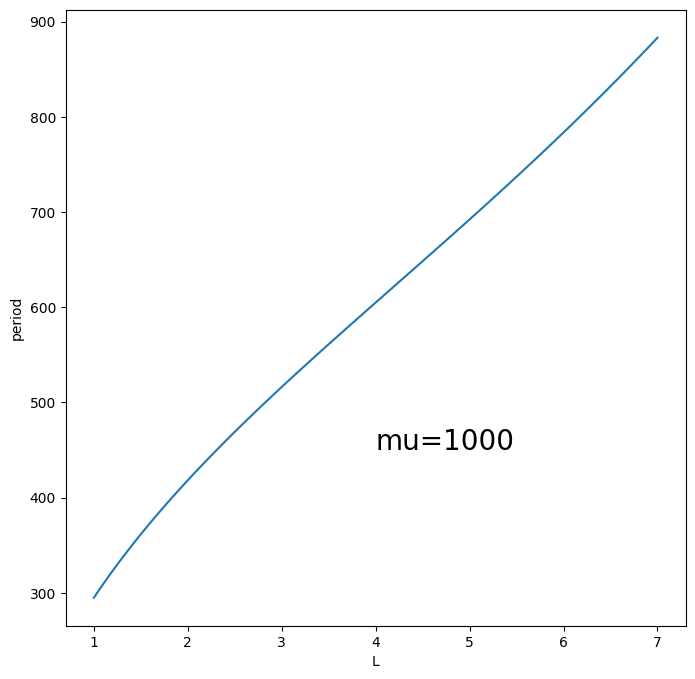

In [8]:
# for a certain Mu value
mu = 1000
L = np.linspace(1, 7, 100) 
y = period_mu(L, mu=mu)
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(L, y)
ax.text(4, 450, 'mu={}'.format(mu), fontdict=dict(fontsize=20))
ax.set_xlabel('L')
ax.set_ylabel('period')

C:\Users\tghyw\AppData\Local\Temp\ipykernel_23500\262539064.py:10: RuntimeWarning: divide by zero encountered in divide
  tau = 360 / phi_dot
c:\Users\tghyw\anaconda3\envs\ptc_sim\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:180: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


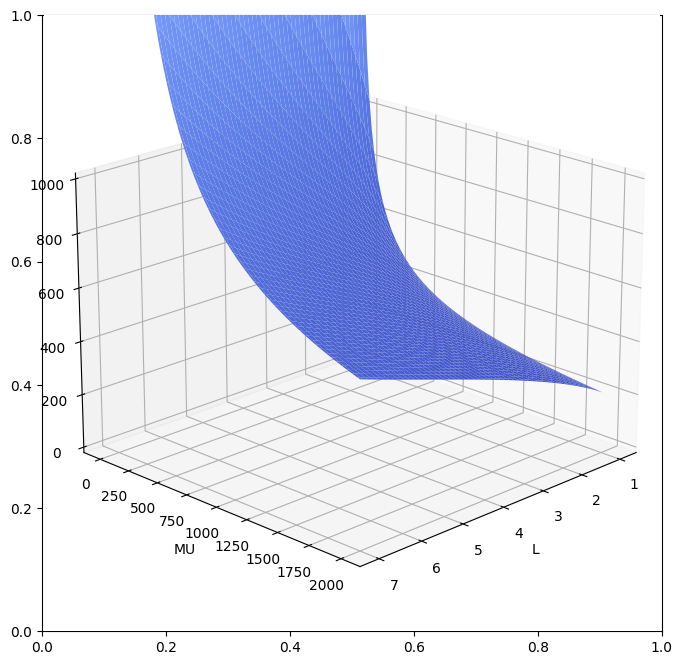

In [9]:
# meshgrid
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

n_mu = 100
n_L =100
mu = np.linspace(0, 2000, n_mu)
L = np.linspace(1, 7, n_L)
X, Y = np.meshgrid(L, mu)
Z = period_mu(X, Y)


fig, ax = plt.subplots(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.set_zlim(0, 1000)
ax.set_xlabel('L')
ax.set_ylabel('MU')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.view_init(elev=20,    # 仰角
             azim=45    # 方位角
            )

In [10]:
from scipy.optimize import curve_fit
def func1(x, a, b,c):
    return a*pow(x,b)+c

def func2(x,a,b):
    return a*x+b

def fit_grad_logplot(xdata,ydata,title, savedir:str):
    try:
        popt, pcov = curve_fit(func2,xdata=xdata,ydata=ydata,p0=[0.01,-2],maxfev=1000)
        #获取popt里面是拟合系数
        print(popt)
        a = popt[0] 
        b = popt[1]
        # c = popt[2]
        yvals = func2(xdata,a,b) #拟合y值
        corr = np.corrcoef(xdata, ydata)
        plt.plot(xdata, ydata, 's',label='original values')
        plt.plot(xdata, yvals, 'r',label='polyfit values')
        plt.xlabel('log2(lsh)')
        plt.ylabel('log2(pol_freq)')
        plt.xticks(np.linspace(np.min(xdata), np.max(xdata), 5), np.round(np.power(np.linspace(np.min(xdata), np.max(xdata), 5), 2), 1))
        plt.yticks(np.linspace(np.min(ydata), np.max(ydata), 5), np.round(np.power(np.linspace(np.min(ydata), np.max(ydata), 5), 2), 1))
        plt.legend(loc=1) #指定legend的位置右下角
        plt.title(title)
        plt.text((np.max(xdata)+np.min(xdata))/2,(np.max(ydata)+np.min(ydata))/2,s='gradient = ' + str(round(a,2)) + '\n' + 'r = ' + str(round(corr[0,1], 2)))
        # plt.savefig(savedir+title+' log.jpg')
        plt.show()
    except:
        print('empty data')
    
    return (a, b, round(corr[0,1], 2))

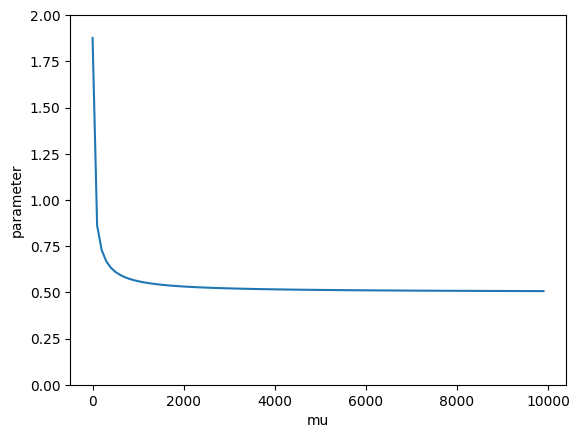

In [11]:
# for a certain Mu value
def poptgenerater():    
    for mu in range(1, 10000, 100):
        L = np.linspace(1, 7, 100) 
        y = period_mu(L, mu=mu)
        xdata = np.log(L)
        ydata = np.log(y)
        popt, pcov = curve_fit(func2,xdata=xdata,ydata=ydata,p0=[0.01,-2],maxfev=1000)
        yield (mu, popt)

mus = list()
popts = list()
for item in poptgenerater():
    mus.append(item[0])
    popts.append(item[1][0])

plt.xlabel('mu')
plt.ylabel('parameter')
plt.ylim(0, 2)
plt.plot(mus, popts)

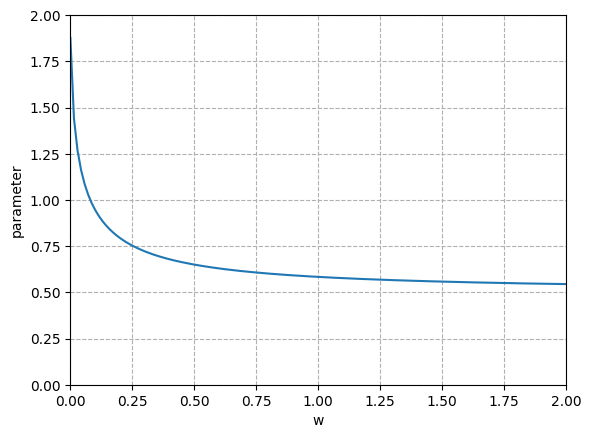

In [12]:
# for a certain Mu value
def poptgenerater():    
    for mu in range(1, 3000, 10):
        L = np.linspace(1, 7, 100) 
        y = period_mu(L, mu=mu)
        xdata = np.log(L)
        ydata = np.log(y)
        popt, pcov = curve_fit(func2,xdata=xdata,ydata=ydata,p0=[0.01,-2],maxfev=1000)
        yield (mu, popt)

def mu2e(mu, L):
    B = 0.311*L**(-3)
    W = B * mu
    return W
mus = list()
popts = list()
for item in poptgenerater():
    mus.append(item[0])
    popts.append(item[1][0])

ws = mu2e(np.array(mus), 6)
plt.xlabel('w')
plt.ylabel('parameter')
plt.ylim(0, 2)
plt.xlim(0,2)
plt.plot(ws, popts)
plt.grid(linestyle='--')

Text(0.5, 1.0, 'radial velocity contained theoretical curve')

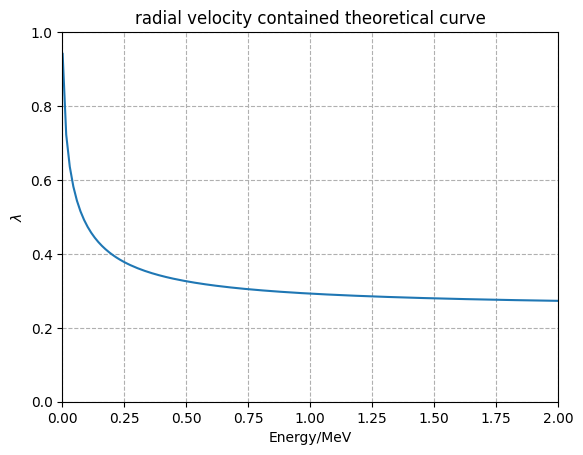

In [13]:
# 加入了径向速度运动修正后的曲线
Lambdas = popts
tangvelvalue = 0.02
r1 = np.arange(5, 7, 0.11)
r0 = 6
lambdastars = []
for Lambda in Lambdas:
    lambda_stars =  (np.log(((-Lambda-2)*(r0**(-2)-r1**(-2)))/
                            (2 * r0**Lambda * (r1**(-Lambda-2)-r0**(-Lambda-2)))))/(np.log(r1/r0))
    lambda_star = np.mean(lambda_stars)
    lambdastars.append(lambda_star)
plt.plot(ws, lambdastars)
plt.grid(linestyle='--')
plt.ylim(0, 1)
plt.xlim(0,2)
plt.xlabel('Energy/MeV')
plt.ylabel('$\lambda$')
plt.title("radial velocity contained theoretical curve")

In [14]:
# Given the position and wave frequency calculate the MU
def mu_calculation(freq, L, m):   
    '''
    freq(Hz), L(distance devided by earth radius) n(mode_number)--> Mu(MeV/G)
    '''
    omega = freq
    omega_d = omega / m
    tau  = 1 / omega_d # drift period

    return mu


In [5]:
def period_mu(L, mu, alpha=np.pi*0.5): # mu(MeV/Guass)
    B = 0.311 / L**3
    W = mu * B
    W_static = 0.511 # MeV
    g_alpha = 0.7 + 0.3 * np.sin(alpha)
    gamma = 1 + W/W_static
    betasquare = 1 - 1 / gamma**2   
    phi_dot = 3.50e-2 * L * g_alpha * gamma * betasquare
    tau = 360 / phi_dot
    return tau

In [109]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from datetime import timedelta
from dateutil import parser
from scipy import interpolate
import numpy as np
import pyspedas
import pytplot
from pytplot import tplot, get_data, store_data
import cdflib
import h5py
import pandas as pd
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")


probe = 'b'

if probe == 'a':
    dir = 'rbspa'
elif probe == 'b':
    dir = 'rbspb'    

# 定义数据文件位置
emfisis_dir = r'D:\jupyternotebook\themis_data\rbsp_data\\' + dir + r'\emfisis\\'
mageis_dir = r'D:\jupyternotebook\themis_data\rbsp_data\\' + dir + r'\mageis\\'
rept_dir = r'D:\jupyternotebook\themis_data\rbsp_data\\' +  dir + r'\rept\\'
MagEphem_dir = r'D:\jupyternotebook\themis_data\rbsp_data\\' + dir + r'\MagEphem\\'

# irbem_file = r'D:\IRBEM\libirbem.dll'
# omni_file = r'D:\jupyternotebook\themis_data/omni2_h0_mrg1hr_20150701_v01.cdf'

emfisis_files = os.listdir(emfisis_dir)
rept_files = os.listdir(rept_dir)
mageis_files = os.listdir(mageis_dir)
MagEphem_files = os.listdir(MagEphem_dir) # 使用MagpEphem的rstar, K和磁场数据

# 开始时间
t0 = datetime(2015,11,6)


for i in range(1):
    time = t0 + timedelta(days=i)
    timestr = time.strftime("%y%m%d")
    rept_file = [file for file in rept_files if timestr in file][0]
    # mageis_file = [file for file in mageis_files if timestr in file][0]
    MagEphem_file = [file for file in MagEphem_files if timestr in file][0]

    pyspedas.cdf_to_tplot(rept_dir + rept_file) # 使用pyspedas读取rept数据
    mlat = get_data('MLT')
    rept_cdf = cdflib.CDF(rept_dir + rept_file)
    rept_fedu_data = get_data('FEDU')
    MagEphem_data = h5py.File(MagEphem_dir + MagEphem_file) # 使用h5py读取MagEphem数据
    MagEphem_Iso = MagEphem_data['IsoTime'][:] # Iso时间
    MagEphem_timedble = [datetime.timestamp(parser.parse(t.decode("utf-8"))) for t in MagEphem_Iso] # 将IsoTime转换为datetime.timestamp
    lstar_data = MagEphem_data['Lstar'][:]
    # store_data("MagEphem_Mag", data={'x':MagEphem_timedble, 'y':MagEphem_data['Bsc_gsm'][:]}) # 储存磁场数据为tplot变量
    # store_data("rept_FEDU_temp", data={'x':rept_fedu_data.times, 'y':rept_fedu_data.y[:,:,:]})
    # pyspedas.tinterpol("rept_FEDU_temp", "MagEphem_Mag", newname="rept_FEDU_interp") # 将FEDU数据插值到同Magephem相同


29-Apr-24 12:03:03: No VAR_TYPE or PARAMETER_TYPE attributes defined for variable FEDU_Unbinned_Sector_Angle, skipping
29-Apr-24 12:03:03: No VAR_TYPE or PARAMETER_TYPE attributes defined for variable FPDU_Unbinned_Sector_Angle, skipping


29-Apr-24 12:03:04: Length of v (1) and x (7888) do not match.  Cannot create tplot variable FPDU.
29-Apr-24 12:03:04: FPDU is currently not in pytplot.
29-Apr-24 12:03:04: FPDU is currently not in pytplot.
29-Apr-24 12:03:04: FPDU is currently not in pytplot.
29-Apr-24 12:03:04: FPDU is currently not in pytplot.
29-Apr-24 12:03:04: Length of v (1) and x (7888) do not match.  Cannot create tplot variable FPDU_0to180.
29-Apr-24 12:03:04: FPDU_0to180 is currently not in pytplot.
29-Apr-24 12:03:04: FPDU_0to180 is currently not in pytplot.
29-Apr-24 12:03:04: FPDU_0to180 is currently not in pytplot.
29-Apr-24 12:03:04: FPDU_0to180 is currently not in pytplot.
29-Apr-24 12:03:04: Length of v (1) and x (7888) do not match.  Cannot create tplot variable FPDU_180to360.
29-Apr-24 12:03:04: FPDU_180to360 is currently not in pytplot.
29-Apr-24 12:03:04: FPDU_180to360 is currently not in pytplot.
29-Apr-24 12:03:04: FPDU_180to360 is currently not in pytplot.
29-Apr-24 12:03:04: FPDU_180to360 is c

(16745.75, 16745.791666666668)

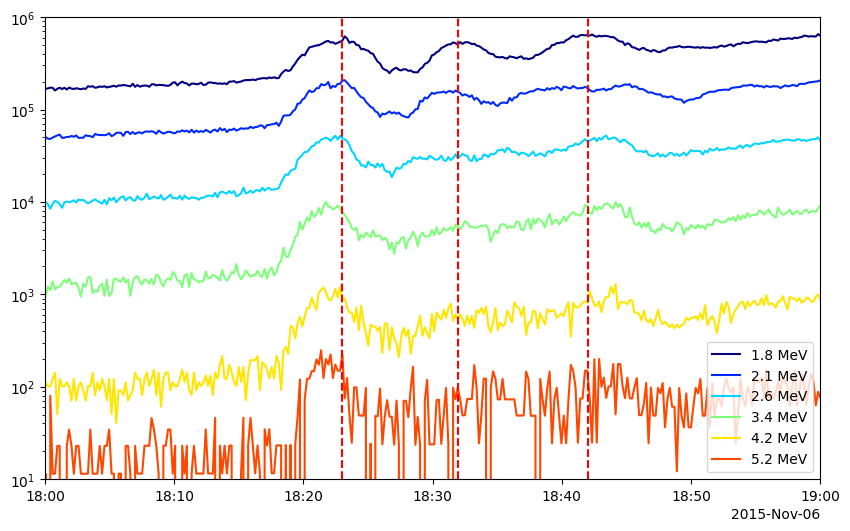

In [105]:
from dateutil import parser
from pyspedas.cotrans.cotrans_lib import get_time_parts
def t2datetime(t):
    time_parts = get_time_parts(t)
    years, doys, hrs, mins, secs = time_parts[0], time_parts[1], time_parts[2], time_parts[3], time_parts[4]
    datetimes = [datetime(year, 1, 1) + timedelta(days=int(doy-1), hours=int(hours), minutes=int(minutes), seconds=seconds) for year, doy, hours, minutes, seconds in zip(years, doys, hrs, mins, secs)]
    return datetimes

np.shape(rept_fedu_data.y)
times = rept_fedu_data.times
datetimes = t2datetime(times)
rept_flux = rept_fedu_data.y
PA = rept_fedu_data.v1
etunnel = rept_fedu_data.v2
fig, ax = plt.subplots(1,1, figsize=(10,6), dpi=100)
for i in range(6):
    e = etunnel[i]
    flux = rept_flux[:, 8, i]
    ax.plot(datetimes, flux, c=plt.cm.jet(i/6), label="{} MeV".format(e))
ax.legend()
ax.vlines(datetime(2015,11,6,18,23,0), 1e1, 1e6, linestyle='--', color='r')
ax.vlines(datetime(2015,11,6,18,32,0), 1e1, 1e6, linestyle='--', color='r')
ax.vlines(datetime(2015,11,6,18,42,0), 1e1, 1e6, linestyle='--', color='r')
# ax.grid()
ax.set_yscale('log')
ax.set_ylim(1e1, 1e6)
ax.set_xlim(datetime(2015,11,6,18,0,0),datetime(2015,11,6,19,0,0))

(4.0, 7.0)

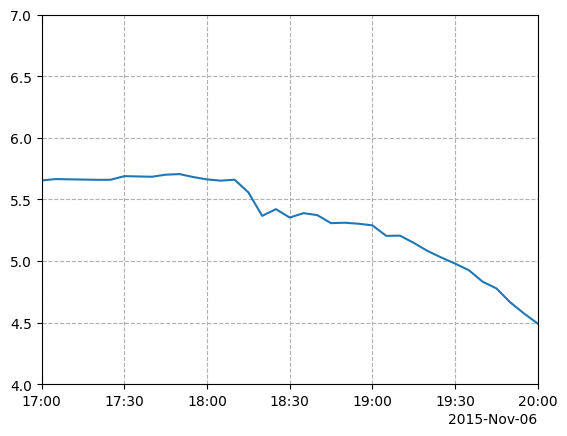

In [125]:
times = t2datetime(MagEphem_timedble)
plt.plot(times, lstar_data[:, 0])
plt.xlim(datetime(2015,11,6,17,0,0),datetime(2015,11,6,20,0,0))
plt.grid(linestyle='--')
plt.ylim(4,7)

In [122]:
times = t2datetime(MagEphem_timedble)
plt.plot(times, lstar_data[:, 0])
plt.xlim(datetime(2015,11,6,17,0,0),datetime(2015,11,6,20,0,0))
plt.grid(linestyle='--')
plt.ylim(4,7)

(289,)

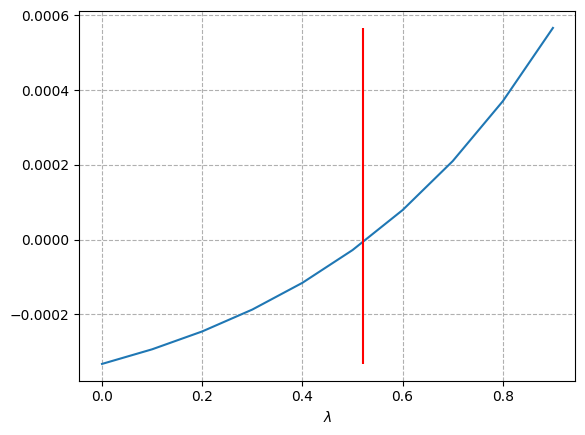

In [23]:
def result(Lambda, L1, L2):
    lam = 0.52
    T = 1/2 * L1 ** (-2) - 1/2 * L2 ** (-2)
    m = L2 ** (Lambda-1) * T - 1 / (lam -3) * L2 ** (lam - 3) + 1 / (lam -3) * L1 ** (lam - 3)
    return m

x = np.arange(0, 1, 0.1)
y = result(x, 7, 7.5)
plt.xlabel("$\lambda$")
plt.plot(x, y)
plt.vlines(0.52, np.min(y), np.max(y), colors='r')
plt.grid(linestyle='--')

实际最外圈电场相位位置 309.5874067655419
粒子最终位置 309.6873032799499


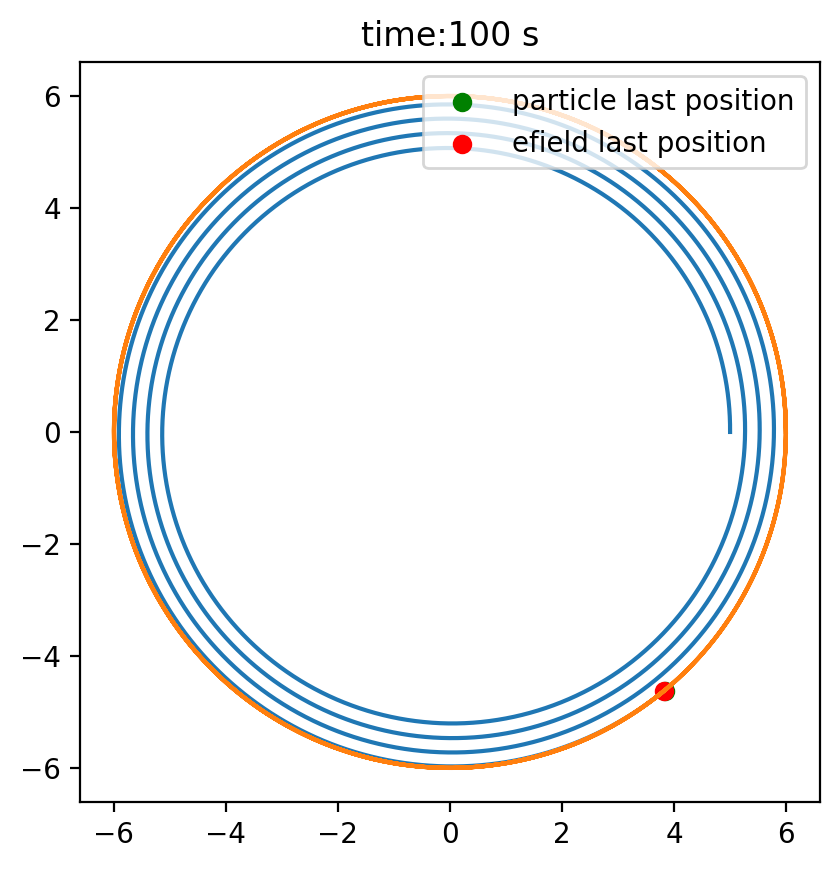

In [142]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import math

# 当径向的电漂移速度设置为常数的情况
x0 = (5, 0)
r0 = np.linalg.norm(x0)

param = 0.52
def ptcv(t,y):
    raddist = np.linalg.norm(y)
    unitvec = y / raddist
    perpvec = np.array([-unitvec[-1], unitvec[0]])
    tangvel = perpvec * 0.1 * raddist ** (param+1)
    radvel = unitvec * 1e-2
    vel = np.add(tangvel, radvel)
    return vel

def efieldv(t, y):
    raddist = np.linalg.norm(y)
    unitvec = y / raddist        
    perpvec = np.array([-unitvec[-1], unitvec[0]])
    # 计算理论上电场传播速度相关的Lambda*的值
    Lambda_star = (np.log(raddist**(param+1) - r0**(param+1)) - np.log((param+1)*(raddist-r0)))/np.log(raddist) + 1
    tangvel = perpvec * 0.1 * raddist ** Lambda_star
    return tangvel

# def thetacal(y, t, Lambda):
#     raddist = np.linalg.norm(y)
#     path = 0.1 * raddist ** Lambda * t
#     theta = path / raddist
#     return np.mod(np.rad2deg(theta), 360)

t0 = 0
t_end = 100
y0 = np.array([5, 0])
sol = solve_ivp(
    ptcv,
    [t0, t_end],
    y0,
    method='Radau',
    t_eval=np.linspace(t0, t_end, 10000)
)

final_point = np.array([sol.y[0][-1], sol.y[1][-1]])
sol2 = solve_ivp(
    efieldv,
    [t0, t_end],
    np.array([np.linalg.norm(final_point), 0]),
    method='Radau',
    t_eval=np.linspace(t0, t_end, 10000)
)
final_point2 = np.array([sol2.y[0][-1], sol2.y[1][-1]])


# print("理论上最外圈电场最大相位位置：",thetacal(final_point, t_end, 0.5794))
print("实际最外圈电场相位位置",np.mod(np.rad2deg(math.atan2(final_point2[1], final_point2[0])) + 360, 360) )
print("粒子最终位置",np.mod(np.rad2deg(math.atan2(final_point[1], final_point[0])) + 360, 360) )
fig, ax = plt.subplots(dpi=200)
ax.plot(sol.y[0], sol.y[1])
ax.plot(sol2.y[0], sol2.y[1])
ax.scatter(final_point[0], final_point[1], c='g', label='particle last position')
ax.scatter(final_point2[0], final_point2[1], c='r', label='efield last position')
ax.set_title("time:{} s".format(t_end))
ax.legend(loc=1)
ax.set_aspect('equal', 'box')

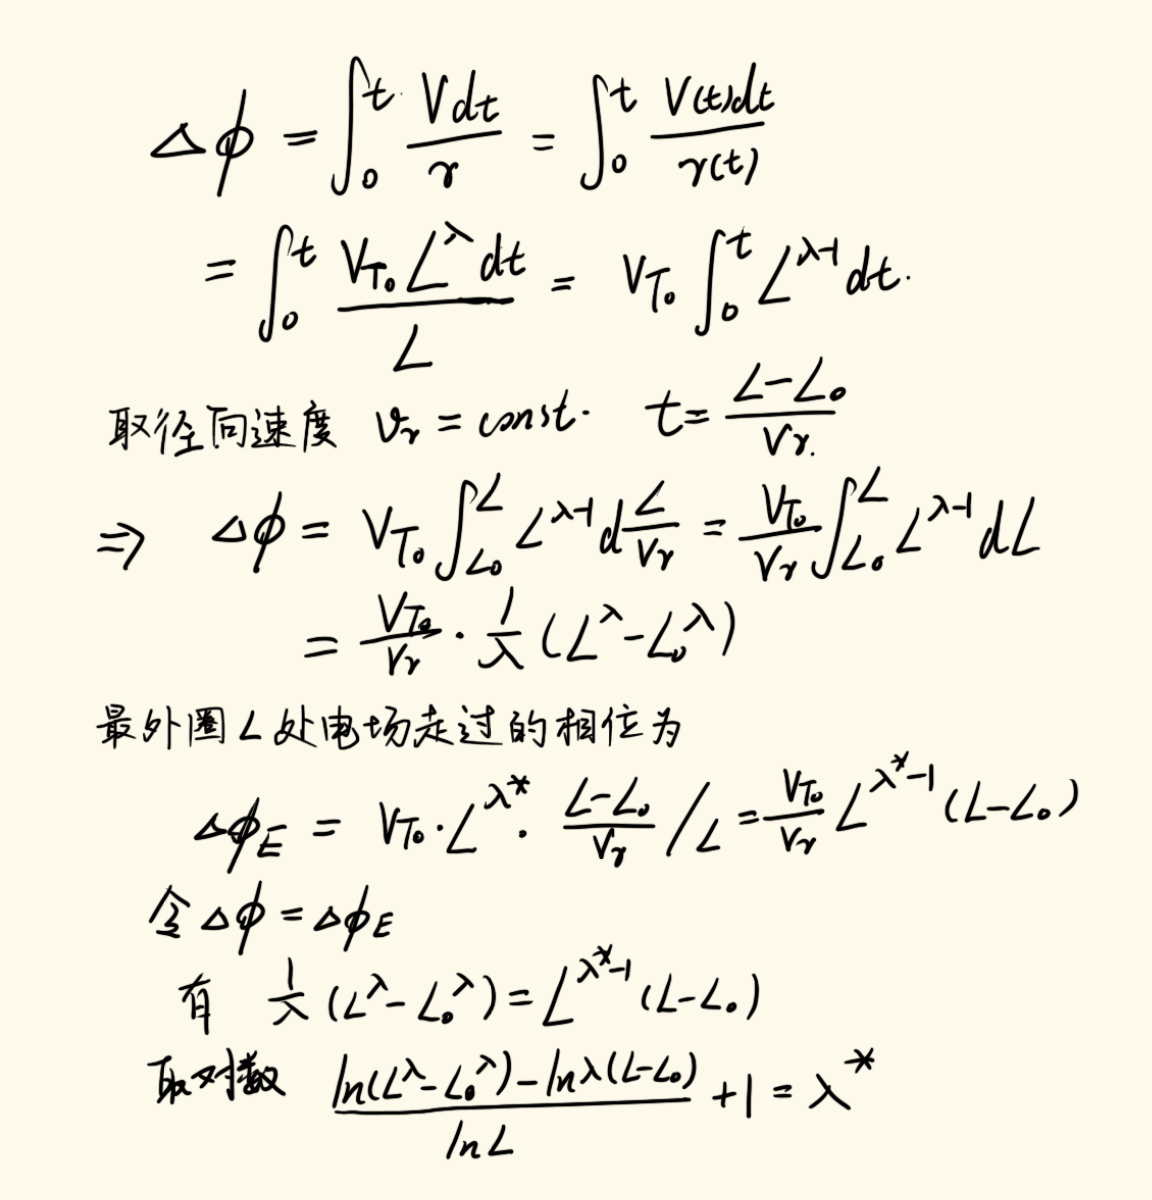

In [231]:
from IPython.display import Image, display
img_path = r'D:\jupyternotebook\themis_data\Screenshot_20240509_150507_com.huawei.hinote.png'
display(Image(filename=img_path))

C:\Users\tghyw\AppData\Local\Temp\ipykernel_24864\500459230.py:5: RuntimeWarning: divide by zero encountered in log
  lambda_stars = (np.log(r1**(Lambda+1) - r0**(Lambda+1)) - np.log((Lambda+1)*(r1-r0)))/np.log(r1) + 1
C:\Users\tghyw\AppData\Local\Temp\ipykernel_24864\500459230.py:5: RuntimeWarning: invalid value encountered in subtract
  lambda_stars = (np.log(r1**(Lambda+1) - r0**(Lambda+1)) - np.log((Lambda+1)*(r1-r0)))/np.log(r1) + 1


Text(0, 0.5, '$\\lambda$')

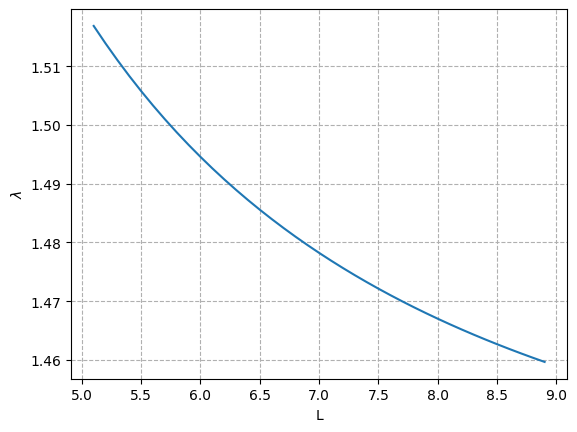

In [143]:
# 在不同L上需要满足的lambda_star的值，可以看出该值大于0.52
Lambda = 0.52  
r1 = np.arange(5, 9, 0.1)
r0 = 5
lambda_stars = (np.log(r1**(Lambda+1) - r0**(Lambda+1)) - np.log((Lambda+1)*(r1-r0)))/np.log(r1) + 1
plt.plot(r1, lambda_stars)
plt.grid(linestyle='--')
plt.xlabel("L")
plt.ylabel("$\lambda$")

实际最外圈电场相位位置 229.40221693726215
粒子最终位置 229.40295237189966
径向距离： 7.069976264958352


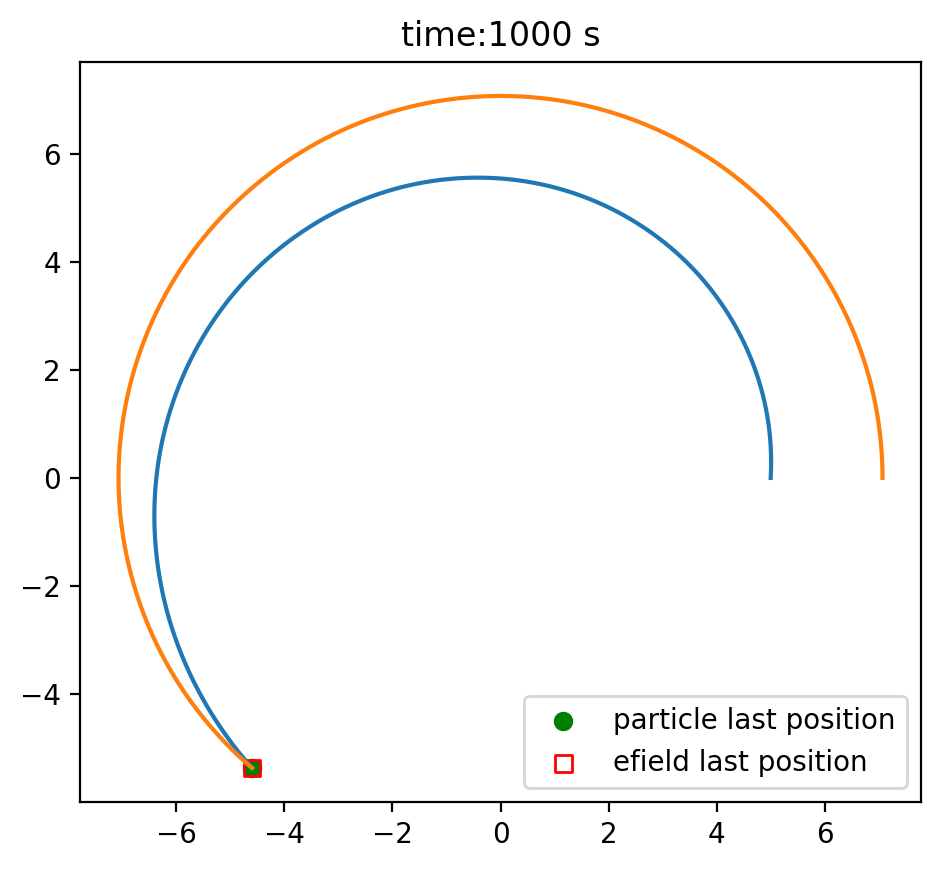

In [481]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import math

# 当径向的电漂移速度设置为常数的情况
x0 = (5, 0)
r0 = np.linalg.norm(x0)

param = 0.52
def ptcv(t,y):
    raddist = np.linalg.norm(y)
    unitvec = y / raddist
    perpvec = np.array([-unitvec[-1], unitvec[0]])
    tangvel = perpvec * 0.01 * raddist ** (-param+1)
    radvel = unitvec * 1e-5 * raddist**3
    vel = np.add(tangvel, radvel)
    return vel

def efieldv(t, y):
    raddist = np.linalg.norm(y)
    unitvec = y / raddist        
    perpvec = np.array([-unitvec[-1], unitvec[0]])
    # 计算理论上电场传播速度相关的Lambda*的值
    # Lambda_star = (np.log(raddist**param - r0**param) - np.log(param*(raddist-r0)))/np.log(raddist) + 1
    Lambda_star = (np.log(((-param-2)*(r0**(-2)-raddist**(-2)))/(2 * (raddist**(-param-2)-r0**(-param-2)))))/(np.log(raddist))
    tangvel = perpvec * 0.01 * raddist ** (-Lambda_star+1)
    return tangvel

# def thetacal(y, t, Lambda):
#     raddist = np.linalg.norm(y)
#     path = 0.1 * raddist ** Lambda * t
#     theta = path / raddist
#     return np.mod(np.rad2deg(theta), 360)

t0 = 0
t_end = 1000
y0 = np.array([5, 0])
sol = solve_ivp(
    ptcv,
    [t0, t_end],
    y0,
    method='Radau',
    t_eval=np.linspace(t0, t_end, 10000)
)

final_point = np.array([sol.y[0][-1], sol.y[1][-1]])
sol2 = solve_ivp(
    efieldv,
    [t0, t_end],
    np.array([np.linalg.norm(final_point), 0]),
    method='Radau',
    t_eval=np.linspace(t0, t_end, 10000)
)
final_point2 = np.array([sol2.y[0][-1], sol2.y[1][-1]])


# print("理论上最外圈电场最大相位位置：",thetacal(final_point, t_end, 0.5794))
print("实际最外圈电场相位位置",np.mod(np.rad2deg(math.atan2(final_point2[1], final_point2[0])) + 360, 360) )
print("粒子最终位置",np.mod(np.rad2deg(math.atan2(final_point[1], final_point[0])) + 360, 360) )
print("径向距离：", np.linalg.norm(final_point))
fig, ax = plt.subplots(dpi=200)
ax.plot(sol.y[0], sol.y[1])
ax.plot(sol2.y[0], sol2.y[1])
ax.scatter(final_point[0], final_point[1], c='g', label='particle last position')
ax.scatter(final_point2[0], final_point2[1], label='efield last position', marker='s', edgecolor='r', facecolor='none')
ax.set_title("time:{} s".format(t_end))
ax.legend()
ax.set_aspect('equal', 'box')

Text(0, 0.5, '$\\lambda$')

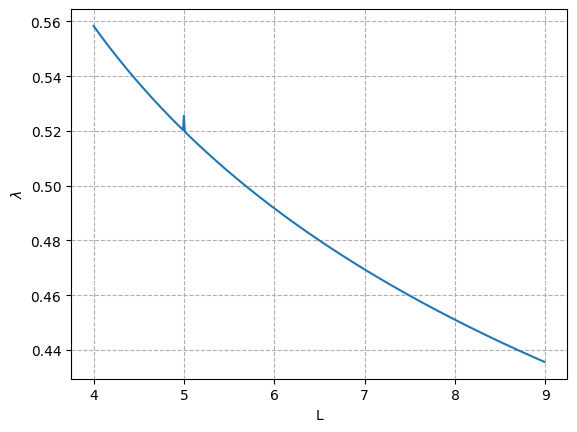

In [489]:
# 在不同L上需要满足的lambda_star的值，可以看出该值大于0.52
Lambda = 0.52  
r1 = np.arange(4, 9, 0.01)
r0 = 5
lambda_stars =  (np.log(((-Lambda-2)*(r0**(-2)-r1**(-2)))/(2 * (r1**(-Lambda-2)-r0**(-Lambda-2)))))/(np.log(r1))
plt.plot(r1, lambda_stars)
plt.grid(linestyle='--')
plt.xlabel("L")
plt.ylabel("$\lambda$")

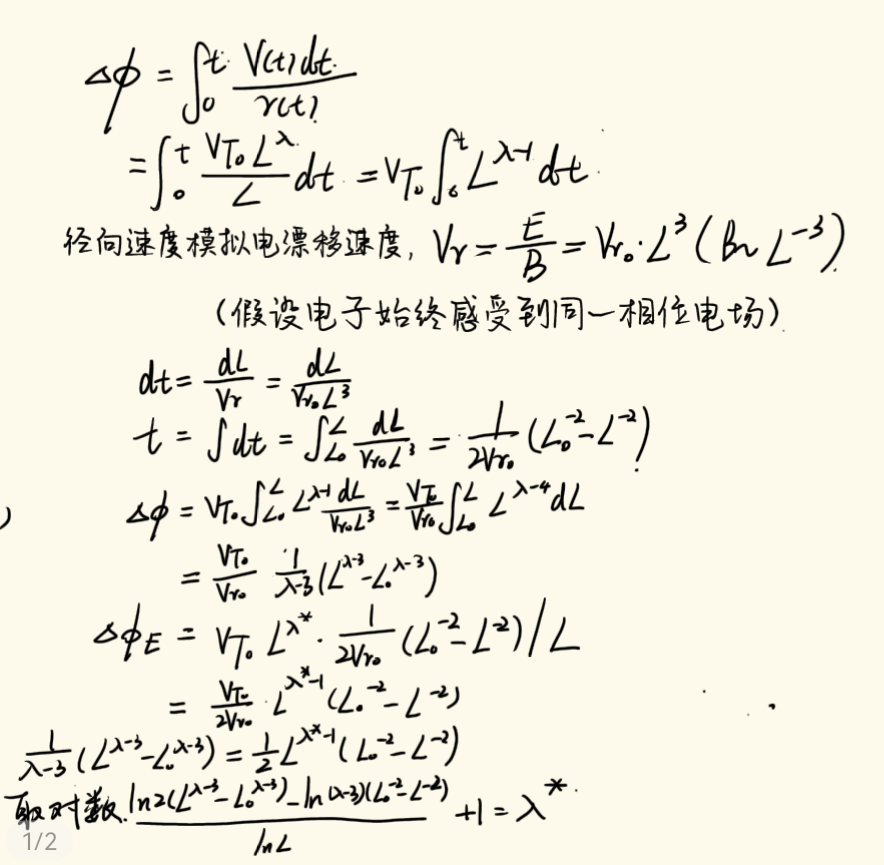

In [279]:
from IPython.display import Image, display
img_path = r'D:\jupyternotebook\themis_data\Screenshot_20240509_161213_com.huawei.hinote.png'
display(Image(filename=img_path))

C:\Users\tghyw\AppData\Local\Temp\ipykernel_20404\592465225.py:26: RuntimeWarning: invalid value encountered in scalar divide
  Lambda_star = (np.log(((-param-2)*(r0**(-2)-raddist**(-2)))/(2 * (raddist**(-param-2)-r0**(-param-2)))))/(np.log(raddist))


实际最外圈电场相位位置 49.60667197352939
粒子最终位置 49.75479813164168
径向距离： 9.18457201262126


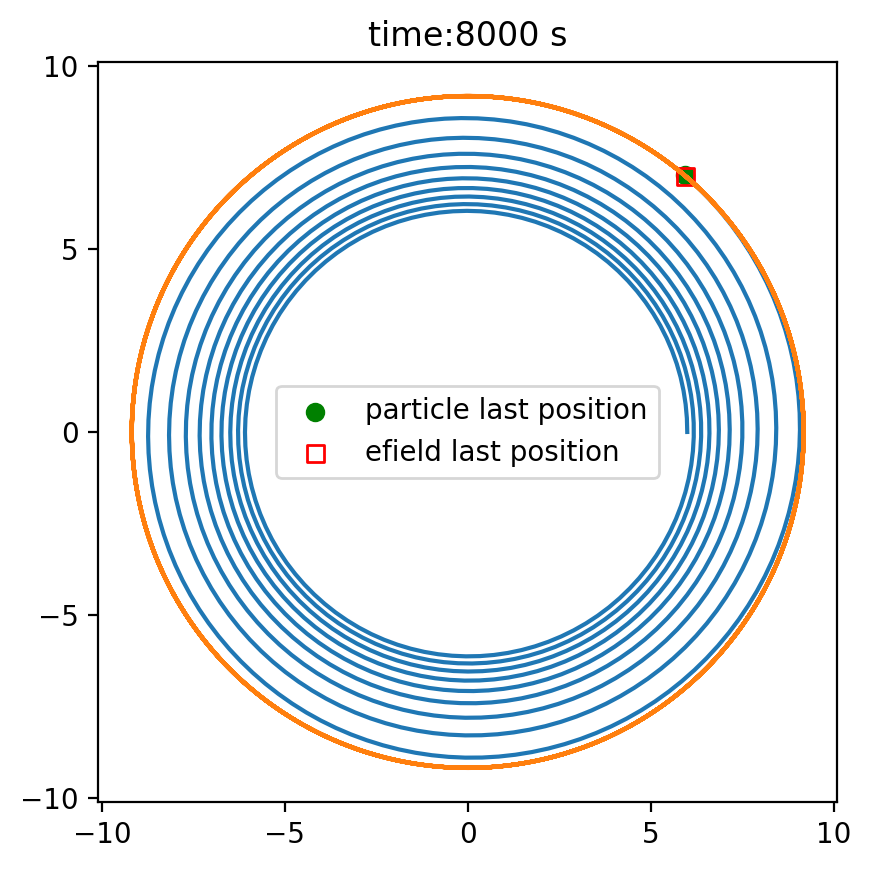

In [1]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import math

# 当径向的电漂移速度设置为常数的情况
x0 = np.array([6, 0])
r0 = np.linalg.norm(x0)

param = 0.52
tangvelvalue = 0.02
E0 = 1e-6

Es = []
omegas = []
def ptcv(t,y):
    raddist = np.linalg.norm(y)
    unitvec = y / raddist
    perpvec = np.array([-unitvec[-1], unitvec[0]])
    tangvel = perpvec * tangvelvalue * raddist ** (-param+1)
    coordx = y[0]
    coordy = y[1]
    theta = math.atan2(coordy, coordx)
    phi0 = np.pi/2
    tau = 2 * np.pi * r0 / (tangvelvalue * r0 ** (-param+1))
    Lambda_star = (np.log(((-param-2)*(r0**(-2)-raddist**(-2)))/(2 * (raddist**(-param-2)-r0**(-param-2)))))/(np.log(raddist))
    # Lambda_star = 0.5
    if np.isnan(Lambda_star):
        Lambda_star = param
    omega = 2 * np.pi / tau * (raddist/r0) ** Lambda_star
    omega = tangvelvalue * raddist**(-Lambda_star)
    omegas.append(omega)
    E = E0 * np.sin(omega * t - theta + phi0) 
    # E = 1e-6
    radvel = unitvec * raddist**3 *  E
    Es.append(np.mod(np.rad2deg(omega * t - theta + phi0), 360))
    vel = np.add(tangvel, radvel)
    return vel

def efieldv(t, y):
    raddist = np.linalg.norm(y)
    unitvec = y / raddist        
    perpvec = np.array([-unitvec[-1], unitvec[0]])
    # 计算理论上电场传播速度相关的Lambda*的值
    # Lambda_star = (np.log(raddist**param - r0**param) - np.log(param*(raddist-r0)))/np.log(raddist) + 1
    Lambda_star = (np.log(((-param-2)*(r0**(-2)-raddist**(-2)))/(2 * (raddist**(-param-2)-r0**(-param-2)))))/(np.log(raddist))
    tangvel = perpvec * tangvelvalue * raddist ** (-Lambda_star+1)
    # print(np.linalg.norm(tangvel))
    return tangvel

# def thetacal(y, t, Lambda):
#     raddist = np.linalg.norm(y)
#     path = 0.1 * raddist ** Lambda * t
#     theta = path / raddist
#     return np.mod(np.rad2deg(theta), 360)

t0 = 0
t_end = 8000
y0 = x0
sol = solve_ivp(
    ptcv,
    [t0, t_end],
    y0,
    method='Radau',
    t_eval=np.linspace(t0, t_end, 1000)
)

final_point = np.array([sol.y[0][-1], sol.y[1][-1]])
sol2 = solve_ivp(
    efieldv,
    [t0, t_end],
    np.array([np.linalg.norm(final_point), 0]),
    method='Radau',
    t_eval=np.linspace(t0, t_end, 10000)
)
final_point2 = np.array([sol2.y[0][-1], sol2.y[1][-1]])


# print("理论上最外圈电场最大相位位置：",thetacal(final_point, t_end, 0.5794))
print("实际最外圈电场相位位置",np.mod(np.rad2deg(math.atan2(final_point2[1], final_point2[0])) + 360, 360) )
print("粒子最终位置",np.mod(np.rad2deg(math.atan2(final_point[1], final_point[0])) + 360, 360) )
print("径向距离：", np.linalg.norm(final_point))
fig, ax = plt.subplots(dpi=200)
ax.plot(sol.y[0], sol.y[1])
ax.plot(sol2.y[0], sol2.y[1])
ax.scatter(final_point[0], final_point[1], c='g', label='particle last position')
ax.scatter(final_point2[0], final_point2[1], label='efield last position', marker='s', edgecolor='r', facecolor='none')
ax.set_xticks([-10, -5, 0, 5, 10])
ax.set_yticks([-10, -5, 0, 5, 10])
ax.set_title("time:{} s".format(t_end))
ax.legend()
ax.set_aspect('equal', 'box')

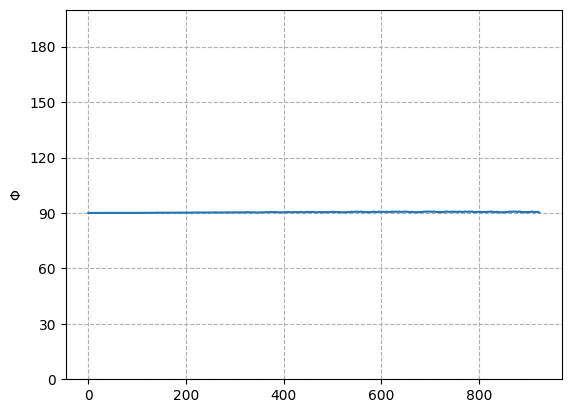

In [11]:
window_size = 30

# 计算移动平均
Es = np.convolve(Es, np.ones(window_size)/window_size, mode='valid')
plt.plot(Es[:])
plt.ylim(0, 200)
plt.ylabel("$\Phi$")
plt.yticks([0,30,60,90,120,150,180])
plt.grid(linestyle='--')

Text(0, 0.5, '$\\lambda$')

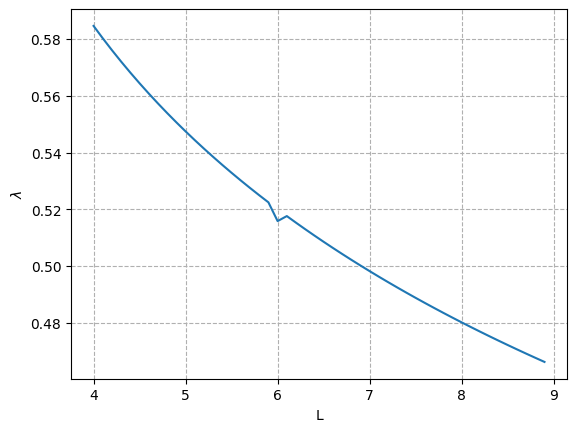

In [23]:
# 在不同L上需要满足的lambda_star的值，可以看出该值大于0.52
Lambda = 0.52  
r1 = np.arange(4, 9, 0.1)
r0 = 6
lambda_stars =  (np.log(((-Lambda-2)*(r0**(-2)-r1**(-2)))/(2 * (r1**(-Lambda-2)-r0**(-Lambda-2)))))/(np.log(r1))
plt.plot(r1, lambda_stars)
plt.grid(linestyle='--')
plt.xlabel("L")
plt.ylabel("$\lambda$")

C:\Users\tghyw\AppData\Local\Temp\ipykernel_20404\3025704568.py:26: RuntimeWarning: invalid value encountered in scalar divide
  Lambda_star = (np.log(((-param-2)*(r0**(-2)-raddist**(-2)))/(2 * r0**param * (raddist**(-param-2)-r0**(-param-2)))))/(np.log(raddist/r0))


实际最外圈电场相位位置 49.60667196292201
粒子最终位置 49.754798129196615
径向距离： 9.184572012743121


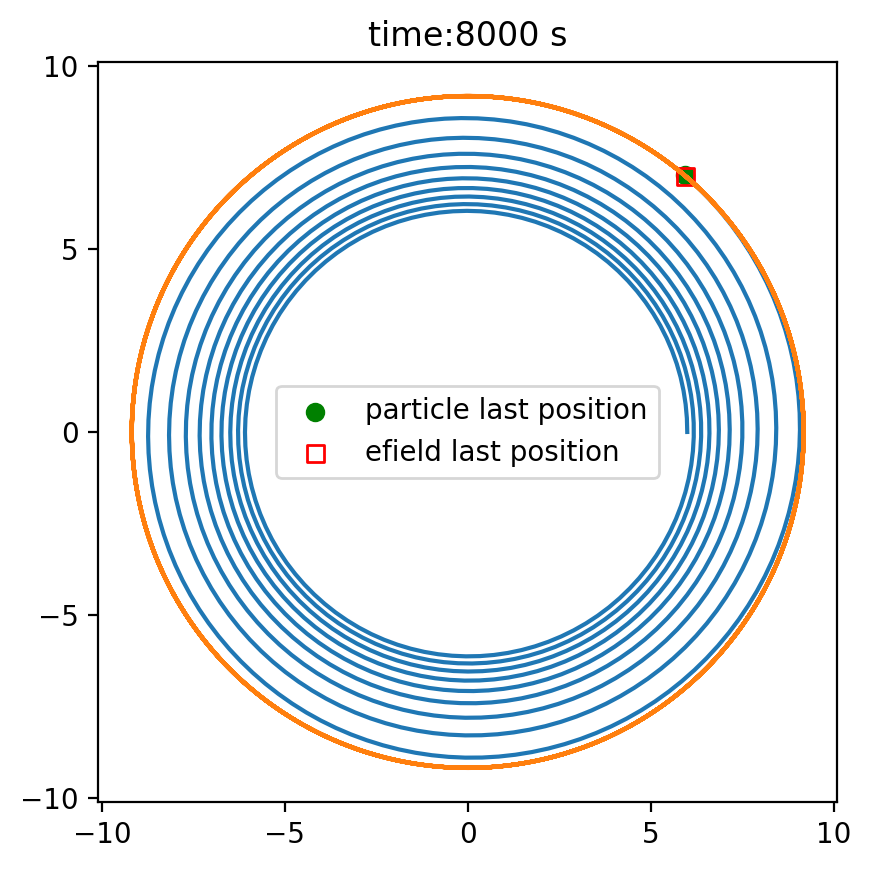

In [28]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import math

# 当径向的电漂移速度设置为常数的情况
x0 = np.array([6, 0])
r0 = np.linalg.norm(x0)

param = 0.52
tangvelvalue = 0.02
E0 = 1e-6

Es = []
omegas = []
def ptcv(t,y):
    raddist = np.linalg.norm(y)
    unitvec = y / raddist
    perpvec = np.array([-unitvec[-1], unitvec[0]])
    tangvel = perpvec * tangvelvalue * raddist ** (-param+1)
    coordx = y[0]
    coordy = y[1]
    theta = math.atan2(coordy, coordx)
    phi0 = np.pi/2
    tau = 2 * np.pi * r0 / (tangvelvalue * r0 ** (-param+1))
    Lambda_star = (np.log(((-param-2)*(r0**(-2)-raddist**(-2)))/(2 * r0**param * (raddist**(-param-2)-r0**(-param-2)))))/(np.log(raddist/r0))
    # Lambda_star = 0.5
    if np.isnan(Lambda_star):
        r0_ = r0 * 1.001
        Lambda_star = (np.log(((-param-2)*(r0_**(-2)-raddist**(-2)))/(2 * r0_**param * (raddist**(-param-2)-r0_**(-param-2)))))/(np.log(raddist/r0_))
    # Lambda_star = 0.3
    omega = 2 * np.pi / tau * (raddist/r0) ** Lambda_star
    omega = tangvelvalue/(r0 ** (param-Lambda_star)) * raddist**(-Lambda_star)
    omegas.append(omega)
    E = E0 * np.sin(omega * t - theta + phi0) 
    # E = 1e-6
    radvel = unitvec * raddist**3 *  E
    Es.append(np.mod(np.rad2deg(omega * t - theta + phi0), 360))
    vel = np.add(tangvel, radvel)
    return vel

def efieldv(t, y):
    raddist = np.linalg.norm(y)
    unitvec = y / raddist        
    perpvec = np.array([-unitvec[-1], unitvec[0]])
    # 计算理论上电场传播速度相关的Lambda*的值
    # Lambda_star = (np.log(raddist**param - r0**param) - np.log(param*(raddist-r0)))/np.log(raddist) + 1
    Lambda_star = (np.log(((-param-2)*(r0**(-2)-raddist**(-2)))/(2 * r0**param * (raddist**(-param-2)-r0**(-param-2)))))/(np.log(raddist/r0))
    tangvel = perpvec * tangvelvalue/(r0 ** (param-Lambda_star)) * raddist ** (-Lambda_star+1)
    # print(np.linalg.norm(tangvel))
    return tangvel

# def thetacal(y, t, Lambda):
#     raddist = np.linalg.norm(y)
#     path = 0.1 * raddist ** Lambda * t
#     theta = path / raddist
#     return np.mod(np.rad2deg(theta), 360)

t0 = 0
t_end =8000
y0 = x0
sol = solve_ivp(
    ptcv,
    [t0, t_end],
    y0,
    method='Radau',
    t_eval=np.linspace(t0, t_end, 1000)
)

final_point = np.array([sol.y[0][-1], sol.y[1][-1]])
sol2 = solve_ivp(
    efieldv,
    [t0, t_end],
    np.array([np.linalg.norm(final_point), 0]),
    method='Radau',
    t_eval=np.linspace(t0, t_end, 10000)
)
final_point2 = np.array([sol2.y[0][-1], sol2.y[1][-1]])


# print("理论上最外圈电场最大相位位置：",thetacal(final_point, t_end, 0.5794))
print("实际最外圈电场相位位置",np.mod(np.rad2deg(math.atan2(final_point2[1], final_point2[0])) + 360, 360) )
print("粒子最终位置",np.mod(np.rad2deg(math.atan2(final_point[1], final_point[0])) + 360, 360) )
print("径向距离：", np.linalg.norm(final_point))
fig, ax = plt.subplots(dpi=200)
ax.plot(sol.y[0], sol.y[1])
ax.plot(sol2.y[0], sol2.y[1])
ax.scatter(final_point[0], final_point[1], c='g', label='particle last position')
ax.scatter(final_point2[0], final_point2[1], label='efield last position', marker='s', edgecolor='r', facecolor='none')
ax.set_xticks([-10, -5, 0, 5, 10])
ax.set_yticks([-10, -5, 0, 5, 10])
ax.set_title("time:{} s".format(t_end))
ax.legend()
ax.set_aspect('equal', 'box')

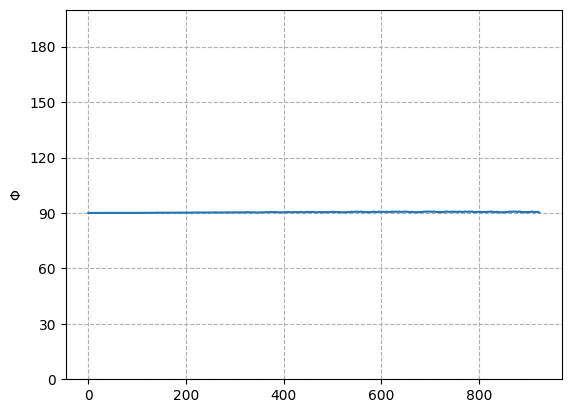

In [15]:
window_size = 30

# 计算移动平均
Es = np.convolve(Es, np.ones(window_size)/window_size, mode='valid')
plt.plot(Es[:])
plt.ylim(0, 200)
plt.ylabel("$\Phi$")
plt.yticks([0,30,60,90,120,150,180])
plt.grid(linestyle='--')

(0.0, 0.5)

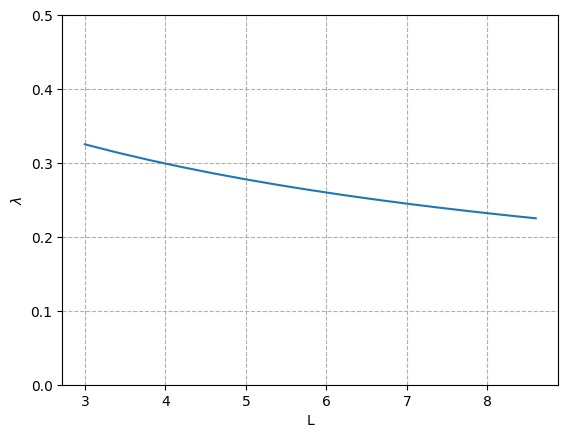

In [16]:
# 在不同L上需要满足的lambda_star的值，可以看出该值大于0.52
Lambda = 0.52  
tangvelvalue = 0.02
r1 = np.arange(3, 9, 0.4)
r0 = 6
lambda_stars =  (np.log(((-Lambda-2)*(r0**(-2)-r1**(-2)))/
                        (2 * r0**Lambda * (r1**(-Lambda-2)-r0**(-Lambda-2)))))/(np.log(r1/r0))
omega1 = tangvelvalue/(r0 ** (Lambda-lambda_stars)) * r1**(-lambda_stars)

plt.plot(r1, lambda_stars)
plt.grid(linestyle='--')
plt.xlabel("L")
plt.ylabel("$\lambda$")
plt.ylim(0,0.5)



Text(0, 0.5, '$\\lambda$')

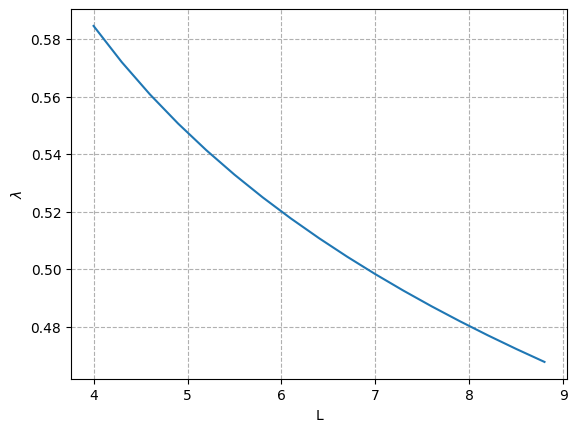

In [17]:
# 在不同L上需要满足的lambda_star的值，可以看出该值大于0.52
Lambda = 0.52  
tangvelvalue = 0.02
r1 = np.arange(4, 9, 0.3)
r0 = 6
lambda_stars =  (np.log(((-Lambda-2)*(r0**(-2)-r1**(-2)))/(2 * (r1**(-Lambda-2)-r0**(-Lambda-2)))))/(np.log(r1))
omega2 = tangvelvalue * r1**(-lambda_stars)
plt.plot(r1, lambda_stars)
plt.grid(linestyle='--')
plt.xlabel("L")
plt.ylabel("$\lambda$")

Text(0, 0.5, '$\\Omega$')

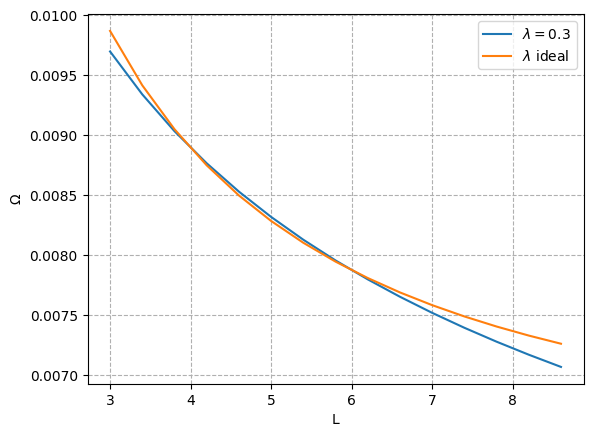

In [58]:
Lambda = 0.52  
tangvelvalue = 0.02
r1 = np.arange(3, 9, 0.4)
r0 = 6
lambda_stars =  (np.log(((-Lambda-2)*(r0**(-2)-r1**(-2)))/(2 * r0**Lambda * (r1**(-Lambda-2)-r0**(-Lambda-2)))))/(np.log(r1/r0))
lambda_stars = 0.3
omega1 = tangvelvalue/(r0 ** (param-lambda_stars)) * r1**(-lambda_stars)

Lambda = 0.52  
tangvelvalue = 0.02
r1 = np.arange(3, 9, 0.4)
r0 = 6
lambda_stars =  (np.log(((-Lambda-2)*(r0**(-2)-r1**(-2)))/(2 * (r1**(-Lambda-2)-r0**(-Lambda-2)))))/(np.log(r1))
omega2 = tangvelvalue * r1**(-lambda_stars)

plt.plot(r1 ,omega1, label='$\lambda=0.3$')
plt.plot(r1, omega2, label='$\lambda$ ideal')
plt.grid(linestyle='--')
plt.legend()
plt.xlabel('L')
plt.ylabel('$\Omega$')